# Interpolation Exercise 2

In [207]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set_style('white')

In [208]:
from scipy.interpolate import griddata

## Sparse 2d interpolation

In this example the values of a scalar field $f(x,y)$ are known at a very limited set of points in a square domain:

* The square domain covers the region $x\in[-5,5]$ and $y\in[-5,5]$.
* The values of $f(x,y)$ are zero on the boundary of the square at integer spaced points.
* The value of $f$ is known at a single interior point: $f(0,0)=1.0$.
* The function $f$ is not known at any other points.

Create arrays `x`, `y`, `f`:

* `x` should be a 1d array of the x coordinates on the boundary and the 1 interior point.
* `y` should be a 1d array of the y coordinates on the boundary and the 1 interior point.
* `f` should be a 1d array of the values of f at the corresponding x and y coordinates.

You might find that `np.hstack` is helpful.

In [209]:
x = np.array([0, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, -5, -5, -5, -5, -5, -5, -5, -5, -5,])
y = np.array([0, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, -4, -3, -2, -1, 0, 1, 2, 3, 4])
f = np.array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

The following plot should show the points on the boundary and the single point in the interior:

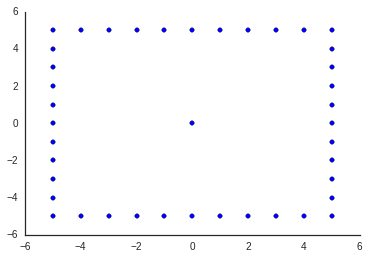

In [210]:
plt.scatter(x, y);
def remove_spines(axes=None, top=False, right=False):
    ax = axes or plt.gca()
    ax.spines['top'].set_visible(top)
    ax.spines['right'].set_visible(right)

remove_spines()

In [211]:
assert x.shape==(41,)
assert y.shape==(41,)
assert f.shape==(41,)
assert np.count_nonzero(f)==1

Use `meshgrid` and `griddata` to interpolate the function $f(x,y)$ on the entire square domain:

* `xnew` and `ynew` should be 1d arrays with 100 points between $[-5,5]$.
* `Xnew` and `Ynew` should be 2d versions of `xnew` and `ynew` created by `meshgrid`.
* `Fnew` should be a 2d array with the interpolated values of $f(x,y)$ at the points (`Xnew`,`Ynew`).
* Use cubic spline interpolation.

In [212]:
from scipy.interpolate import interp1d
from scipy.interpolate import interp2d
from scipy.interpolate import griddata

In [213]:
xnew = np.linspace(-5, 5, 100)

ynew = np.linspace(-5, 5, 100)

Xnew, Ynew = np.meshgrid(xnew, ynew)

In [214]:
Fnew = griddata((x,y), f, (Xnew, Ynew), method='cubic')

In [215]:
assert xnew.shape==(100,)
assert ynew.shape==(100,)
assert Xnew.shape==(100,100)
assert Ynew.shape==(100,100)
assert Fnew.shape==(100,100)

Plot the values of the interpolated scalar field using a contour plot. Customize your plot to make it effective and beautiful.

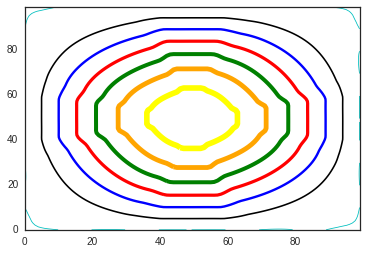

In [216]:
x = plt.contour(Fnew, linewidths=np.arange(.8, 6, .8), colors=('c', 'k', 'blue', 'red', 'green', 'orange', (1,1,0)))
print (x)

In [217]:
assert True # leave this to grade the plot